In [1]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
from tqdm import tqdm  
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [3]:
train_datasets = datasets.CIFAR10('data/', train = True,  download=False,  transform = transforms.Compose([transform]))
test_datasets  = datasets.CIFAR10('data/', train = False, download=False,  transform = transforms.Compose([transform]))

In [4]:
classes = list(train_datasets.classes)
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
train_batches = torch.utils.data.DataLoader(train_datasets, batch_size=32, shuffle = True)
test_batches  = torch.utils.data.DataLoader(test_datasets,  batch_size=32, shuffle = True)

In [6]:
for data in train_batches:
    x,y = data 
    break 

In [7]:
x.shape

torch.Size([32, 3, 32, 32])

In [8]:
y 

tensor([4, 7, 8, 2, 1, 4, 6, 2, 5, 8, 2, 0, 1, 6, 9, 4, 0, 9, 0, 3, 2, 8, 9, 5,
        7, 1, 9, 4, 0, 0, 6, 2])

In [9]:
x[0].shape 

torch.Size([3, 32, 32])

In [10]:
def image_pyplot(image):
    image = image.detach().permute(1,2,0)
    image = image.numpy()
    image = image / 2 + 0.5     # unnormalize
    plt.imshow(image) 

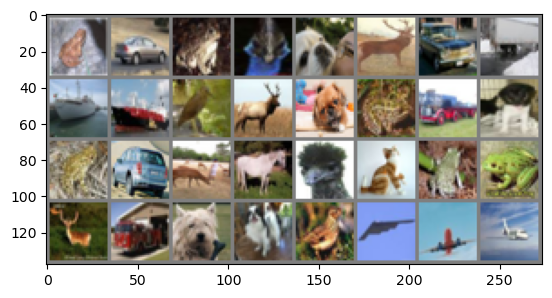

In [11]:
#Grid of images

image_itar = iter(train_batches)
images, labels = next(image_itar)

image_pyplot(torchvision.utils.make_grid(images))

In [12]:
# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.conv_encoder1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv_encoder2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv_encoder3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        
        self.flatten = nn.Flatten(start_dim=1)
        
        self.conv_decoder1 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
        self.conv_decoder2 = nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
        self.conv_decoder3 = nn.ConvTranspose2d(in_channels=8, out_channels=3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                
        
    def forward(self, x):
        
        #---------------------------Encoder-------------------------------------#
        
        x = F.relu(self.conv_encoder1(x))    # torch.Size([32, 8, 32, 32])
        x = nn.MaxPool2d(2, 2)(x)            # torch.Size([32, 8, 16, 16])
        
        x = F.relu(self.conv_encoder2(x))    # torch.Size([32, 16, 16, 16])
        x = nn.MaxPool2d(2, 2)(x)            # torch.Size([32, 16, 8, 8])
        
        x = F.relu(self.conv_encoder3(x))    # torch.Size([32, 32, 8, 8])
        x = nn.MaxPool2d(2, 2)(x)            # torch.Size([32, 32, 4, 4])
        
        #---------------------------Linear--------------------------------------#
        
        x = self.flatten(x)                  # torch.Size([32, 512])
        x = x.view(-1, 32, 4, 4)             # torch.Size([32, 32, 4, 4])
        
        #---------------------------Decoder-------------------------------------#
        
        x = F.relu(self.conv_decoder1(x))    # torch.Size([32, 16, 8, 8])
        x = F.relu(self.conv_decoder2(x))    # torch.Size([32, 8, 16, 16])
        x = F.relu(self.conv_decoder3(x))    # torch.Size([32, 3, 32, 32])
        x = nn.Upsample(scale_factor=2)(x)
        
        return x
    

In [13]:
model_test = Autoencoder()
model_test(x)

tensor([[[[0.1682, 0.1682, 0.1497,  ..., 0.1594, 0.1230, 0.1230],
          [0.1682, 0.1682, 0.1497,  ..., 0.1594, 0.1230, 0.1230],
          [0.2048, 0.2048, 0.1815,  ..., 0.1793, 0.1410, 0.1410],
          ...,
          [0.2056, 0.2056, 0.1947,  ..., 0.1894, 0.1454, 0.1454],
          [0.1486, 0.1486, 0.1289,  ..., 0.1360, 0.1182, 0.1182],
          [0.1486, 0.1486, 0.1289,  ..., 0.1360, 0.1182, 0.1182]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [14]:
model = Autoencoder()
print(model.parameters)

<bound method Module.parameters of Autoencoder(
  (conv_encoder1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_encoder2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_encoder3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_decoder1): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (conv_decoder2): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (conv_decoder3): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)>


In [15]:
def train(train_batches, epochs, lr):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        running_loss = 0.0
        for data in tqdm(train_batches):
            x, _ = data
            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred, x)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1} loss: {running_loss/len(train_batches)}")     
        
    return pred 

In [16]:
pred = train(train_batches, epochs=3, lr=0.01) 

100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:40<00:00, 39.07it/s]


Epoch 1 loss: 0.16421116369413552


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:40<00:00, 38.69it/s]


Epoch 2 loss: 0.15936933024068406


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:36<00:00, 43.25it/s]

Epoch 3 loss: 0.15881626783695574


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


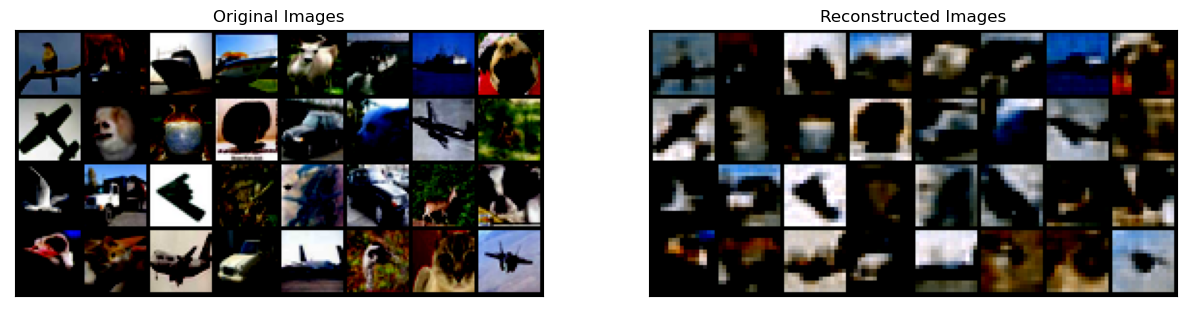

In [17]:
images, _ = next(iter(test_batches))

# Pass the images through the autoencoder
reconstructed_images = model(images)

# Display the original and reconstructed images side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(torchvision.utils.make_grid(images).permute(1, 2, 0))
axs[0].set_title('Original Images')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(torchvision.utils.make_grid(reconstructed_images).permute(1, 2, 0).detach().numpy())
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Reconstructed Images')
plt.show()